<b>Term Deposit Sale </b>

Attribute information
Input variables:
       
Bank client data:
* age:Continuous feature 
* job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
* marital: marital status(married, single, divorced)
* education:education level (primary, secondary, tertiary)
* default: has credit in default? 
* housing: has housing loan? 
* loan: has personal loan?8.balance in account
      
Related to previous contact:
* contact: contact communication type
* month: last contact month of year
* day: last contact day of the month
* duration: last contact duration, in seconds*
          
Other attributes:
* campaign: number of contacts performed during this campaign and for this client
* pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
previous: number of times the client has been contacted before forthe last campaign to subscribe term deposit
* poutcome: outcome of the previous marketing campaign
            
Output variable (desired target):
* Target: Tell us has the client subscribed a term deposit. (Yes, No)

--------------------------------------------------

In [393]:
import warnings
warnings.filterwarnings('ignore')

#--------------------------------------------------
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#--------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#rom IPython.display import Image  
from sklearn import tree
from os import system
#--------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, roc_curve, classification_report
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

----------------------------------

# Deliverable - 1

In [394]:
# import Dataset
bd = pd.read_csv('bank-full.csv')

--------------

In [395]:
#checking how many columns and how many total entries(rows)
bd.shape

(45211, 17)

In [396]:
#checking columns
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [397]:
#checking the first 10 data entries
bd.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [398]:
#checking the last 10 data entries
bd.tail(10)

age           job   marital  education default  balance housing loan  \
45201   53    management   married   tertiary      no      583      no   no   
45202   34        admin.    single  secondary      no      557      no   no   
45203   23       student    single   tertiary      no      113      no   no   
45204   73       retired   married  secondary      no     2850      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45201   cellular   17   nov       226         1    184         4  success   
45202   cellular   17   nov       224         1     -1         0  unknown   
45203   cellular   17   nov       266         1     -1         0  unknown   
45204   cellular   17   nov       300         1     40         8  failure   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45201    yes  
45202    yes  
45203    yes  
45204    yes  
45205    yes  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

<b>At first inspection, there are seemingly invalid entries in certain columns. "unknown" entries can be found in columns "job", "education", "contact" and "poutcome" which is considered as an invalid entries. "poutcome" column also contains entry word "other". Also there are negative values in column pdays. We will see in the next cell what other columns contains erroneous entries.</b>

In [399]:
# Let us count categorical variables and view each entries per column.  
# by doing so, we then see more erroneous entries and its total count.
categorical_cols = ['job','marital', 'education', 'default','housing', 'loan','contact','poutcome','Target','previous']
for i in categorical_cols:
    x = bd[i].value_counts()
    print(i)
    print(x)
    print("")

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Target
no     39922
yes     5289
Name: Target, dtype: int64

previous
0      36954
1       2772
2       2106
3     


<b>Let us further investigate the Dataset on the next cells...</b>



In [400]:
#Let us check datatypes/object
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [401]:
#checking the dataset's descriptive statistic summary
bd.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [402]:
#transpose view of the dataset's descriptive statistic summary
bd.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [403]:
#checking for unique entries
bd.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [404]:
#checking for empty rows/incorrect imputations
bd.isna().values.any()

False

In [405]:
#null values 
bd.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [406]:
#rechecking how many total entries(rows) per columns
bd.shape

(45211, 17)



<b>Based from our query: 
1. 'default','housing','loan','Target' has "yes/no" entries (consider coverting it to 1/0 later)
* There are no missing value in the dataset
* job column has 288 rows with 'unknown' values
* education column has 1857 rows with 'unknown' values
* contact column has 13020 rows with 'unknown' values
* poutcome column has 36959 rows with 'unknown' values
* poutcome column has 1840 rows with 'other' values 
* pdays column has rows that contains negative values</b>

    

----------------------------

## Univariate analysis (12 marks)

a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

-----------------------------

<b><u> UNIVARIATE ANALYSIS </u></b>

Panda-Profiling Report

In [407]:
from pandas_profiling import ProfileReport
ProfileReport(bd)

<b> Let us deal beforehand with the erroneous data entry. Let us process Yes/No Entries by converting them into 1/0 correspondingly. and let us clean negatively signed entries</b>

In [408]:
# coverting "yes" to 1 and "no" to 0
categorical_cols1=['default','housing','loan','Target']
for cat in bd[categorical_cols1]:
    bd[cat]=bd[cat].apply(lambda x: 1 if x=='yes' else 0)

In [409]:
#cleaning the negative values observed with pdays attribute
bd['pdays'] = bd['pdays'].abs()

<b>Let us now do some Exploratory Data Analysis </b>

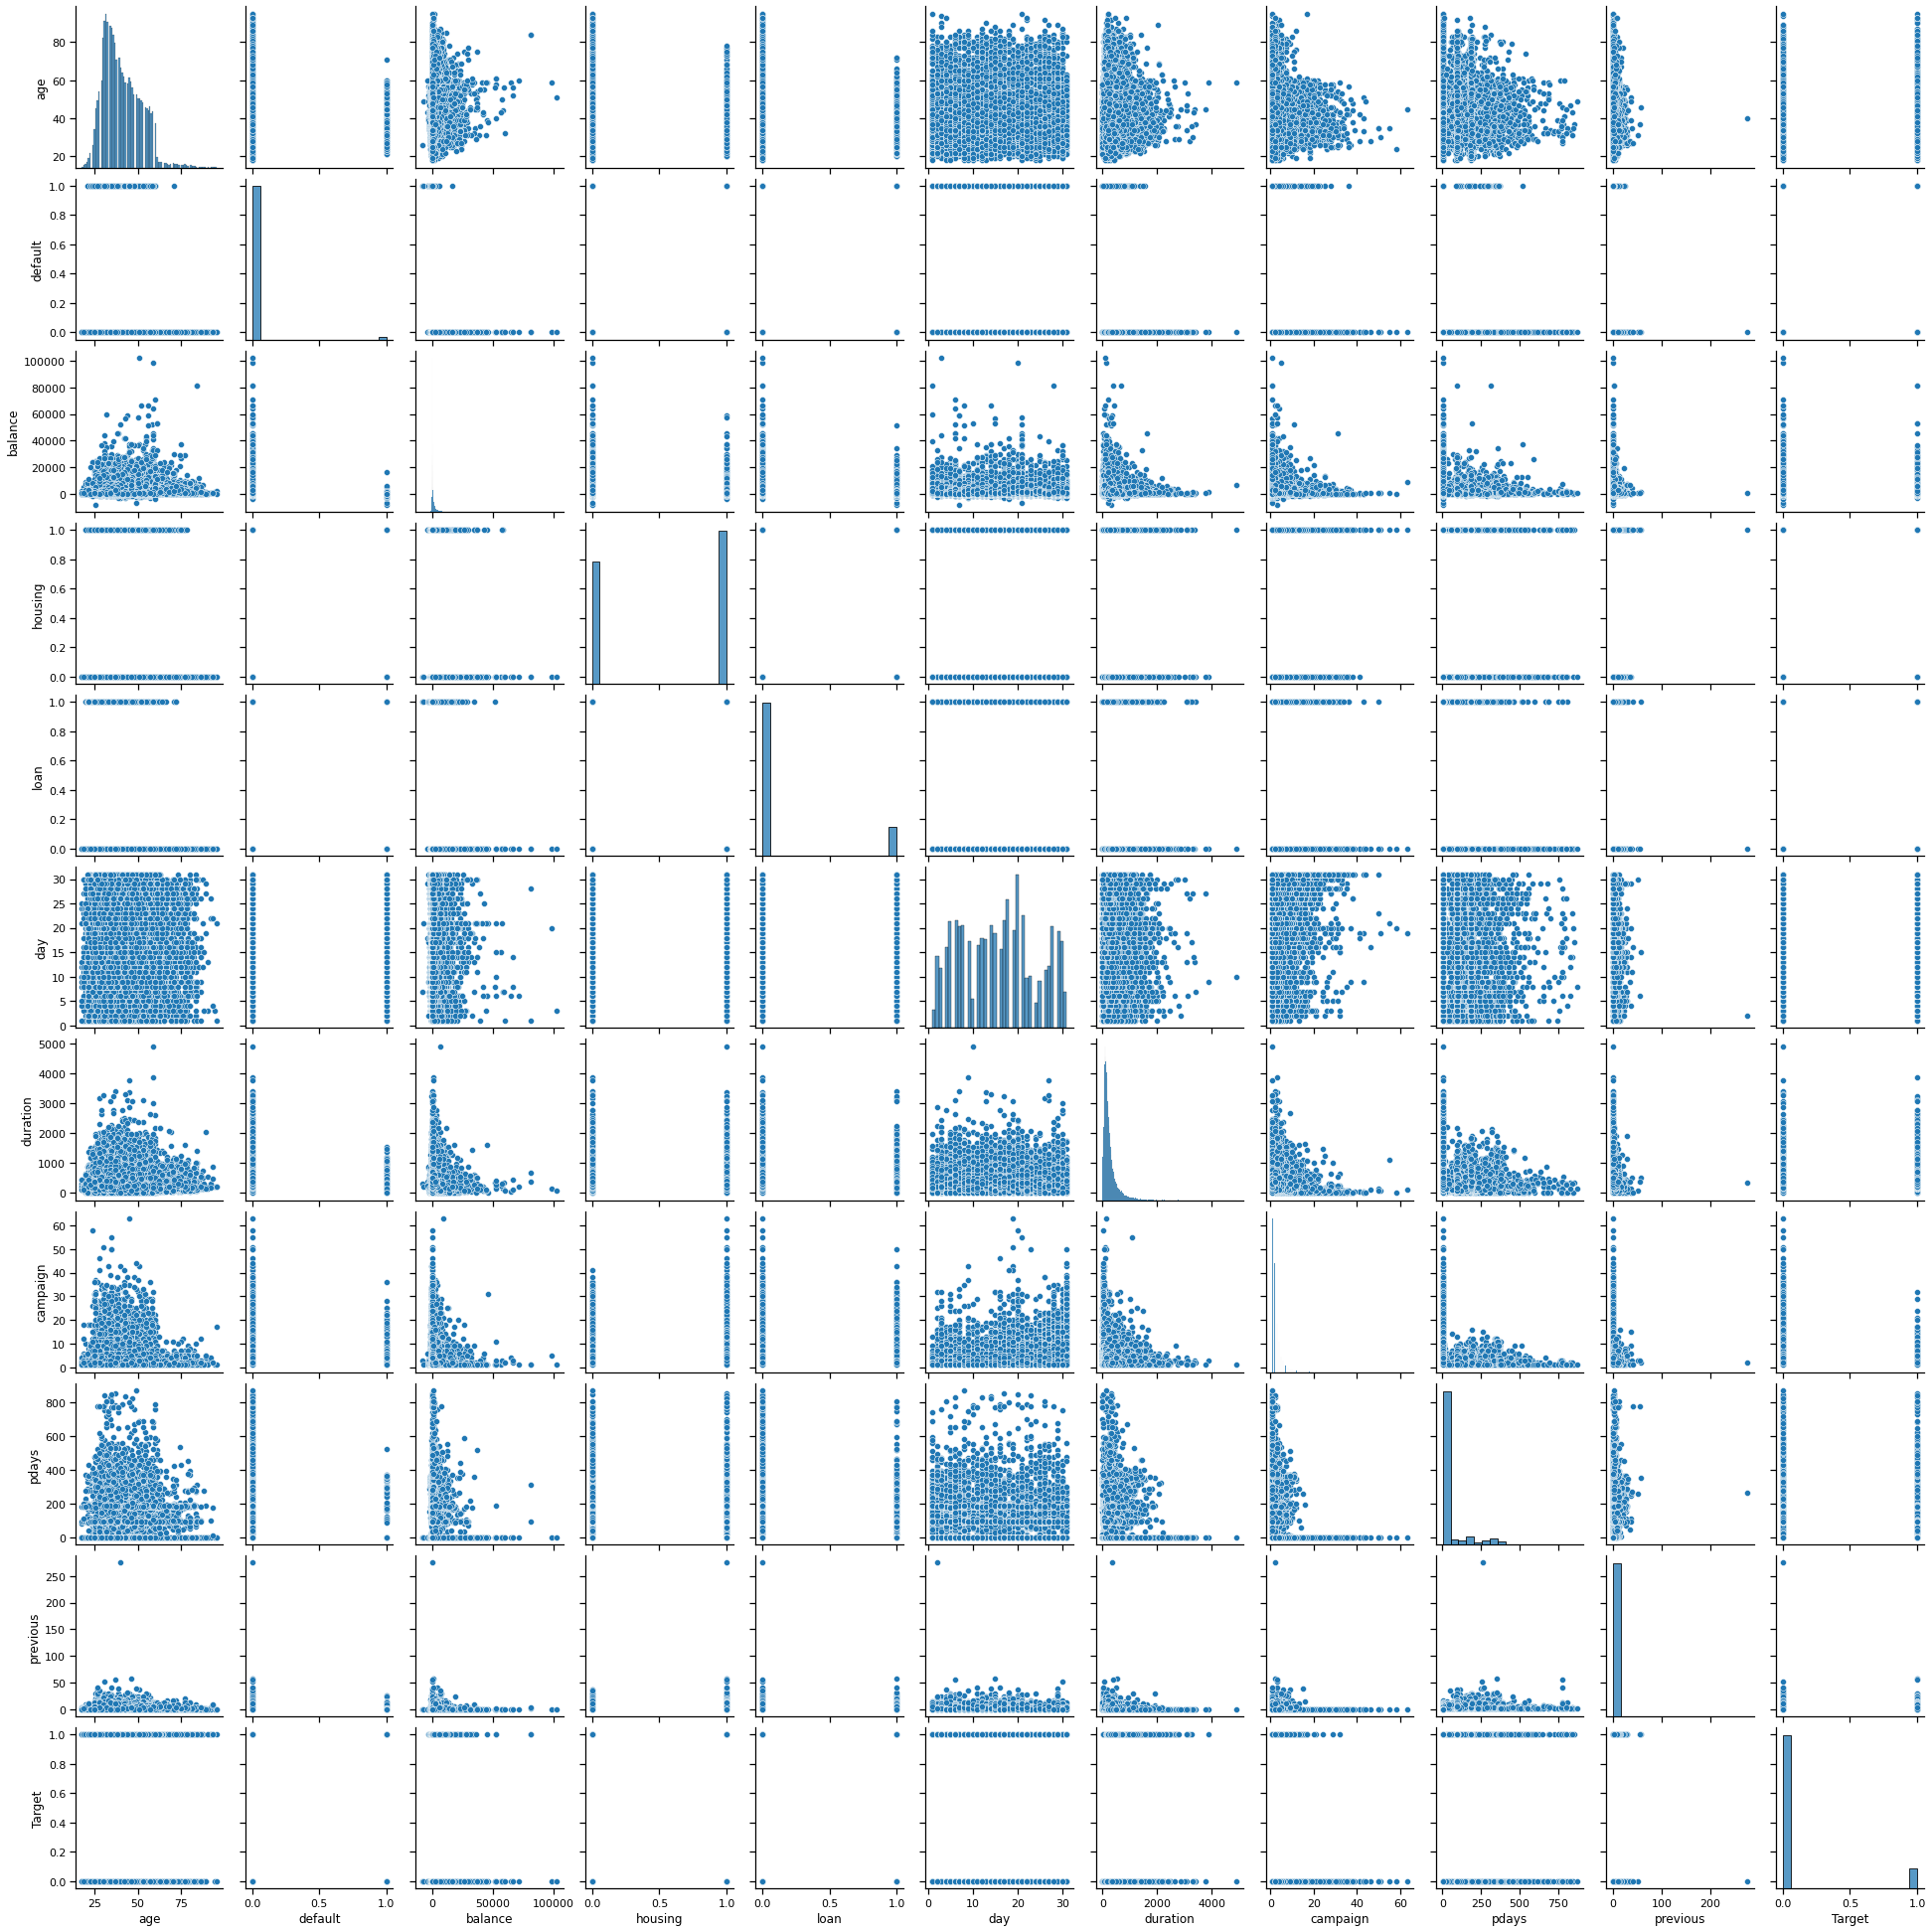

In [410]:
sns.pairplot(bd)

<b>On the following cells, we will try to evaluate the relationship of each variables to the Target variable. Target variable tells us if the client has subscribed (Y) a term deposit or No (0).</b>

Customers Average age : 40.94


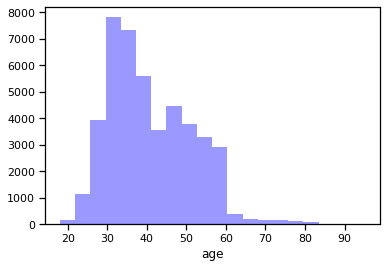

In [411]:
# Let us check the Age distribution
ageave= round(bd.age.mean(),2)
sns.distplot(bd.age, kde=False, bins=20, color='b');
print('Customers Average age :',ageave)

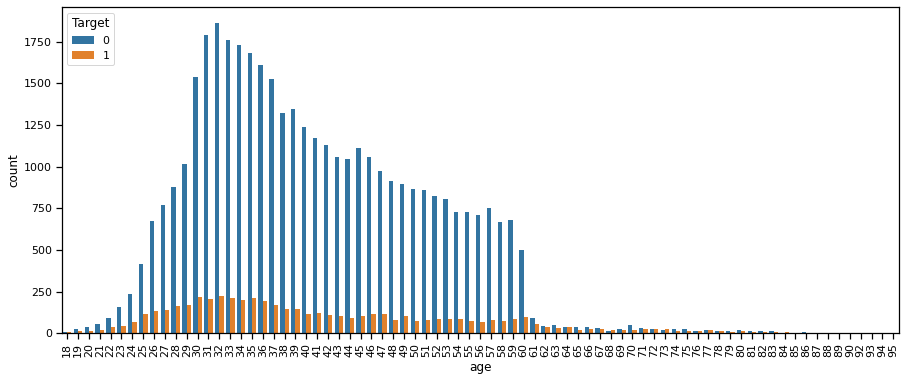

In [412]:
# Let us check age variable in relation to Target variable
plt.figure(figsize=(15,6))
ax=sns.countplot(x='age', data=bd, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=90);

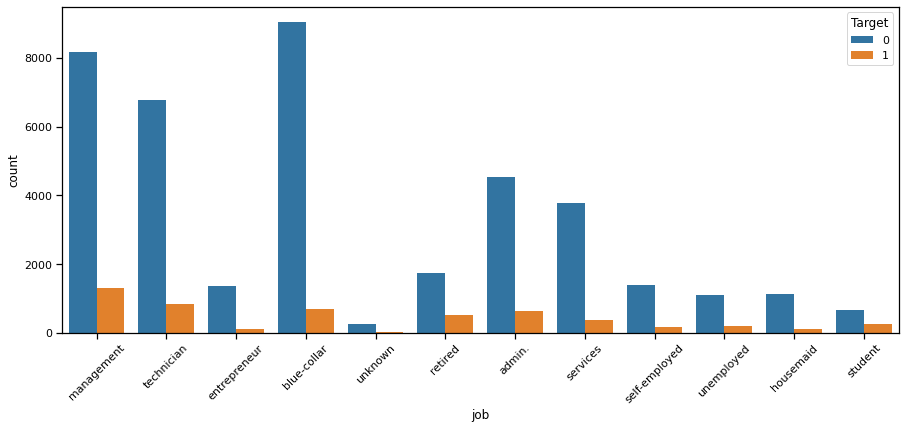

In [413]:
# Let us check jobs variable in relation to Target variable
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job', data=bd, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

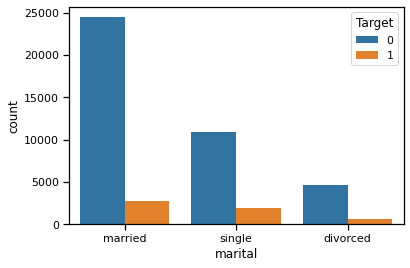

In [414]:
# Let us check the marital variable in relation to the Target variable
sns.countplot(x='marital', data=bd, hue='Target');

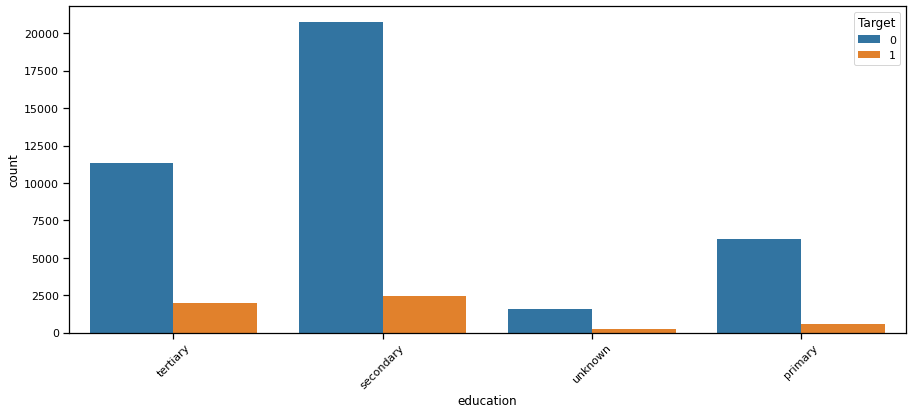

In [415]:
# Let us check the education variable in rlation to Target
plt.figure(figsize=(15,6))
ax=sns.countplot(x='education', data=bd, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

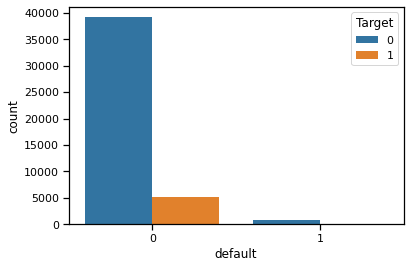

In [416]:
# Let us check the housing variable in relation to Target variable
sns.countplot(x='default', data=bd, hue='Target');

In [417]:
sy = len(bd[bd.default==1])
sn = len(bd[bd.default==0])
print('Percent of customer with credit default :', round(sy/(sy+sn)*100,2),"%")
print('Percent of customer with no credit default :', round(sn/(sy+sn)*100,2),"%")
cd = bd.Target[(bd.default==1)&(bd.Target==1)].count()
print('Number of Customers with credit default that have term deposit :', cd)
cd2 = bd.Target[(bd.default==0)&(bd.Target==1)].count()
print('Number of Customers with no credit default that have term deposit :', cd2)

Percent of customer with credit default : 1.8 %
Percent of customer with no credit default : 98.2 %
Number of Customers with credit default that have term deposit : 52
Number of Customers with no credit default that have term deposit : 5237


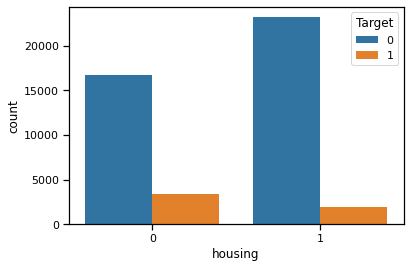

In [418]:
# Let us check the housing variable in relation to Target variable
sns.countplot(x='housing', data=bd, hue='Target');

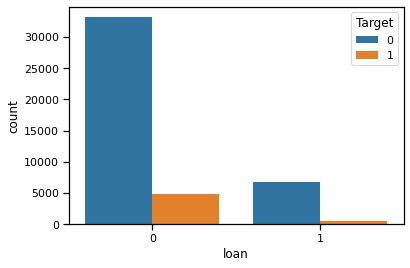

In [419]:
#Let us check loan variable in relation to Target variable
sns.countplot(x='loan', data=bd, hue='Target');

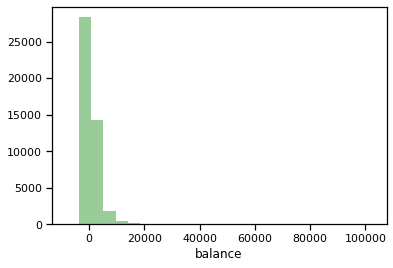

In [420]:
#Let us check balance variable in relation to Target variable
sns.distplot(bd.balance, kde=False, bins=25, color='g');
ban_median = bd.balance.median()
ban_mean = bd.balance.mean()

In [421]:
print('Average customer balance :', round(ban_mean,2))
print('Right skewed distribution (mean - median is positive) :',round(ban_mean-ban_median,2))

Average customer balance : 1362.27
Right skewed distribution (mean - median is positive) : 914.27


In [422]:
negba = bd.balance[bd.balance<0].count()
print('Customer with negative balance account :',negba, '/', round(negba/bd.shape[0]*100,2),"%")

zerba=bd.balance[bd.balance==0].count()
print('Customer with zero balance account :', zerba, '/', round(zerba/bd.shape[0]*100,2),"%")

posba = bd.balance[(bd.balance>0) & (bd.balance<=5000)].count()
print('Customer with balance account between <0, 5,000] :', posba, '/', round(posba/bd.shape[0]*100,2),"%")

higba = bd.balance[bd.balance>5000].count()
print('Customer with balance account higher than 5,000 :', higba, '/', round(higba/bd.shape[0]*100,2),"%")


Customer with negative balance account : 3766 / 8.33 %
Customer with zero balance account : 3514 / 7.77 %
Customer with balance account between <0, 5,000] : 35086 / 77.61 %
Customer with balance account higher than 5,000 : 2845 / 6.29 %


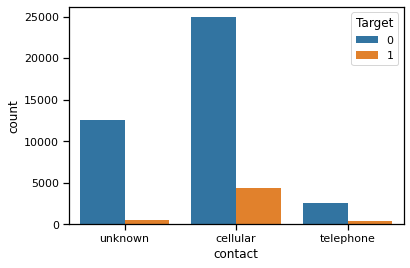

In [423]:
#Let us check contact variable in relation to Target variable
sns.countplot(x='contact', data=bd, hue='Target');

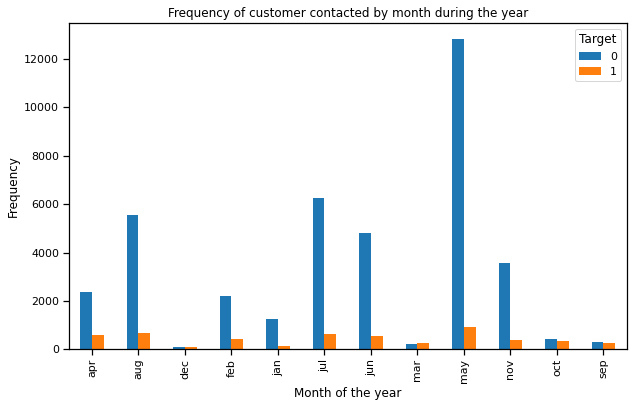

In [424]:
#Let us check month variable in relation to Target variable
pd.crosstab(bd.month,bd.Target).plot(kind='bar', figsize=(10,6));
plt.title('Frequency of customer contacted by month during the year');
plt.xlabel('Month of the year');
plt.ylabel('Frequency');

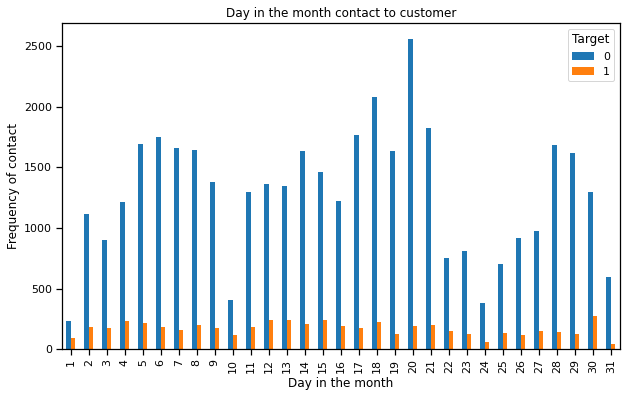

In [425]:
#Let us check day variable in relation to Target variable
pd.crosstab(bd.day,bd.Target).plot(kind='bar',figsize=(10,6));
plt.title('Day in the month contact to customer');
plt.xlabel('Day in the month');
plt.ylabel('Frequency of contact');

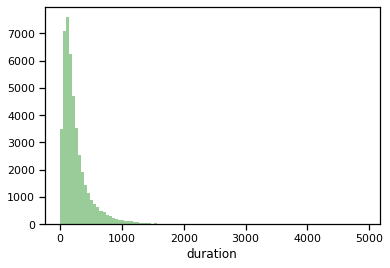

In [426]:
#Let us check duration variable in relation to Target variable
sns.distplot(bd.duration, kde=False, bins=100, color='g');
ban_median = bd.duration.median()
ban_mean = round(bd.duration.mean(),2)

In [427]:
print('Average contact duration time in seconds :',ban_mean)
print('Data shows a right skewed distribution',round(ban_mean-ban_median,2))

Average contact duration time in seconds : 258.16
Data shows a right skewed distribution 78.16


Customer were contacted in Average : 2.76 times


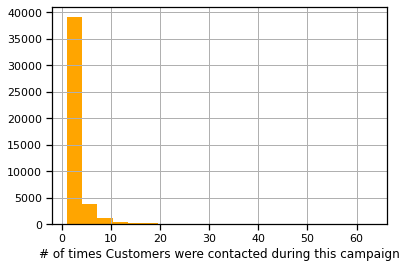

In [428]:
#Let us check campaign variable in relation to Target Variable
print('Customer were contacted in Average :',round(bd.campaign.mean(),2),'times')
bd.campaign.hist(bins=20, color='orange');
plt.xlabel('# of times Customers were contacted during this campaign');

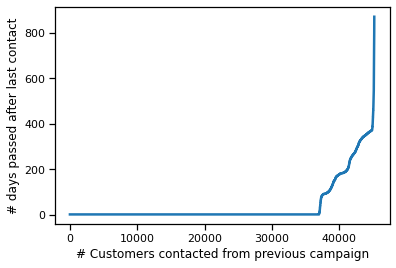

In [429]:
#Let us check pdays variable in relation to Target variable
cnc = bd.pdays[bd.pdays==1].count()
cc = bd.shape[0]-cnc
bd.pdays.sort_values(ignore_index=True).plot();
plt.xlabel('# Customers contacted from previous campaign');
plt.ylabel('# days passed after last contact');

In [430]:
print('Total number of customer contacted from previous campaign :',cc, 'or', round(cc/bd.shape[0]*100,2),'%')
print('Total number of customer that was not contacted from previous campaign:',cnc, 'or', round(cnc/bd.shape[0]*100,2),'%')

Total number of customer contacted from previous campaign : 8242 or 18.23 %
Total number of customer that was not contacted from previous campaign: 36969 or 81.77 %


Average times contacted by Customer before this campaign : 3.18


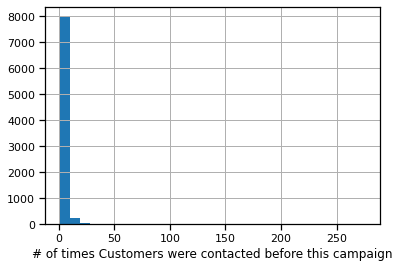

In [431]:
#previous: number of contacts performed before this campaign and for this client
pc = bd.previous[bd.previous>0].mean()
print('Average times contacted by Customer before this campaign :',round(pc,2))
bd.previous[bd.previous>0].hist(bins=30);
plt.xlabel('# of times Customers were contacted before this campaign');

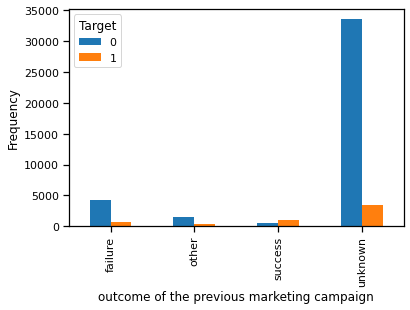

In [432]:
#Let us check pout variable in relation to Target variable
pd.crosstab(bd.poutcome, bd.Target).plot(kind='bar')
plt.xlabel('outcome of the previous marketing campaign');
plt.ylabel('Frequency');

% number of subscriptors to term deposit : 11.7 %
% number of not subscriptors to term deposit : 88.3 %


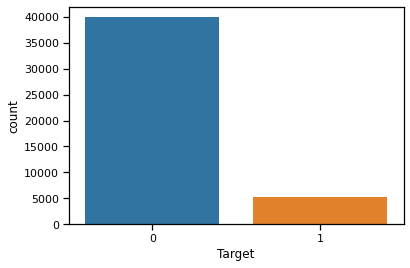

In [433]:
#Evaluating the Target variable
sy = len(bd.Target[bd.Target==1])
sn = len(bd.Target[bd.Target==0])
print('% number of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('% number of not subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bd);

<b>ANALYSIS
* Customer's average age: 40.94
* Top 3 person's age that was able to subscribe to term deposit: 30,32,35
* Top 3 customer professions: Blue-collar, management, technician
* Highest customers profession with term deposit: Management
* Most numbers of customers based on marital status(inorder): (1st)married (2nd)singles (3rd)divorced
* Highest customers based marital status that subscribed to term deposit: Married customer
* Highest customers based in education that subscribed to term deposit: Secondary Education
* Percent number of customer with credit default: 1.8 %
* Percent number of customer with no credit default: 98.2 %
* Total number of customers with credit default that have term deposit: 52
* Total number of  customers with no credit default that have term deposit: 5237
* Most of customers with long term deposit, does not have a housing loan.
* Most of customers with long term deposit, doesnt have personal loan.
* Customer with negative balance account: 3766 / 8.33 %
* Customer with zero balance account: 3514 / 7.77 %
* Customer with balance account between <0-5,000: 35086 / 77.61 %
* Customer with balance account higher than 5,000: 2845 / 6.29 %
* Average customer balance: 1362.27
* Right skewed distribution (mean - median is positive): 914.27
* More customer with cellular unit subscribed a term deposit
* In the month of May, customer were contacted frequently and subscribed for a term deposit
* On the 30th day of the month, a customer was frequently contacted, and subscribed for Term deposit
* Average contact duration time: 258.16seconds
* contact variable shows a right skewed distribution of 78.16
* Customer were contacted in Average: 2.76 times
* Total number of customers contacted from previous campaign : 8242 or 18.23 %
* Total number of customers that was not contacted from previous campaign: 36969 or 81.77 %
* The total percent number of subscriptors to term deposit: 11.7 %
* The total percent number of not subscriptors to term deposit: 88.3 %
</b>

------------------------

## Multivariate analysis (8 marks)

a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [434]:
bd["Target_Int"] = bd["Target"].apply(lambda x: 0 if x == 'no' else 1)
bd.head(10)

age           job   marital  education  default  balance  housing  loan  \
0   58    management   married   tertiary        0     2143        1     0   
1   44    technician    single  secondary        0       29        1     0   
2   33  entrepreneur   married  secondary        0        2        1     1   
3   47   blue-collar   married    unknown        0     1506        1     0   
4   33       unknown    single    unknown        0        1        0     0   
5   35    management   married   tertiary        0      231        1     0   
6   28    management    single   tertiary        0      447        1     1   
7   42  entrepreneur  divorced   tertiary        1        2        1     0   
8   58       retired   married    primary        0      121        1     0   
9   43    technician    single  secondary        0      593        1     0   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  \
0  unknown    5   may       261         1      1         0  unknown       0   
1  unknown    5   may       151         1      1         0  unknown       0   
2  unknown    5   may        76         1      1         0  unknown       0   
3  unknown    5   may        92         1      1         0  unknown       0   
4  unknown    5   may       198         1      1         0  unknown       0   
5  unknown    5   may       139         1      1         0  unknown       0   
6  unknown    5   may       217         1      1         0  unknown       0   
7  unknown    5   may       380         1      1         0  unknown       0   
8  unknown    5   may        50         1      1         0  unknown       0   
9  unknown    5   may        55         1      1         0  unknown       0   

   Target_Int  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1

In [435]:
#Let us check the mean value of all variable in relation to Target variable
round(bd.groupby('Target').mean(),2)

age  default  balance  housing  loan    day  duration  campaign  \
Target                                                                      
0       40.84     0.02  1303.71     0.58  0.17  15.89    221.18      2.85   
1       41.67     0.01  1804.27     0.37  0.09  15.16    537.29      2.14   

        pdays  previous  Target_Int  
Target                               
0       38.10      0.50         1.0  
1       69.98      1.17         1.0

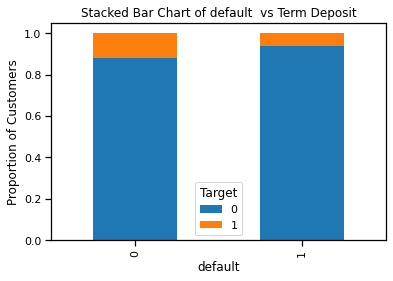

In [436]:
# default
table=pd.crosstab(bd.default, bd.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of default  vs Term Deposit');
plt.xlabel('default');
plt.ylabel('Proportion of Customers');

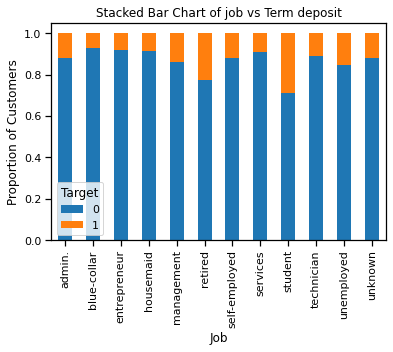

In [437]:
#Job Status
table=pd.crosstab(bd.job, bd.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of job vs Term deposit');
plt.xlabel('Job');
plt.ylabel('Proportion of Customers');

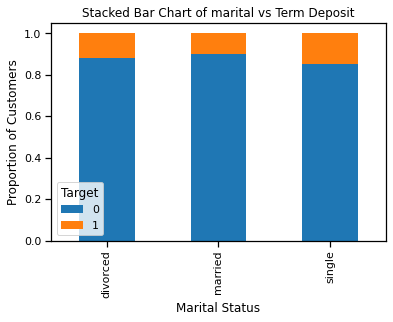

In [438]:
# Marital Status
table=pd.crosstab(bd.marital, bd.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of marital vs Term Deposit');
plt.xlabel('Marital Status');
plt.ylabel('Proportion of Customers');

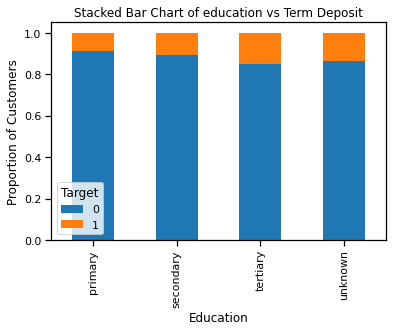

In [439]:
# Education Status
table=pd.crosstab(bd.education, bd.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of education vs Term Deposit');
plt.xlabel('Education');
plt.ylabel('Proportion of Customers');

<AxesSubplot:xlabel='balance'>

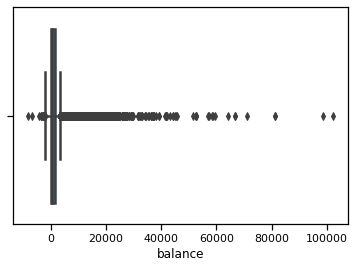

In [440]:
sns.boxplot(bd['balance'])

In [441]:
# from data summary, ProfileReport and above plot, balance has outliers
# balance0	
#(mean)1362.272058 
#(min)-8019.0
#(max) 102127.0
from scipy.stats import zscore
balance_outliers =  zscore(bd['balance'])
print(balance_outliers)

[ 0.25641925 -0.43789469 -0.44676247 ...  1.42959305 -0.22802402
  0.52836436]


<AxesSubplot:xlabel='Target', ylabel='balance'>

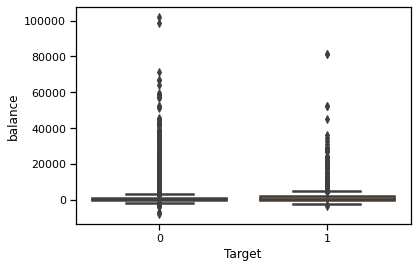

In [442]:
sns.boxplot(bd['Target'],bd['balance'])

<AxesSubplot:xlabel='Target', ylabel='age'>

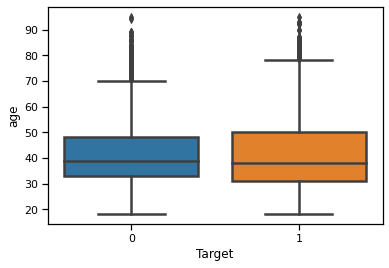

In [443]:
sns.boxplot(bd['Target'],bd['age'])

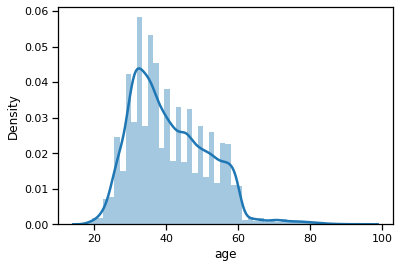

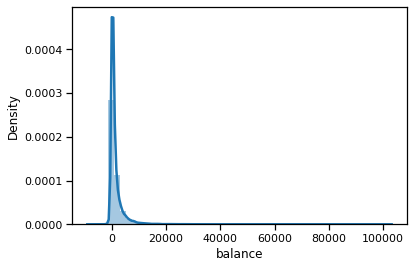

In [444]:
for i in ['age','balance']:
    sns.distplot(bd[i])
    plt.show()

In [445]:
corr = bd.corr()

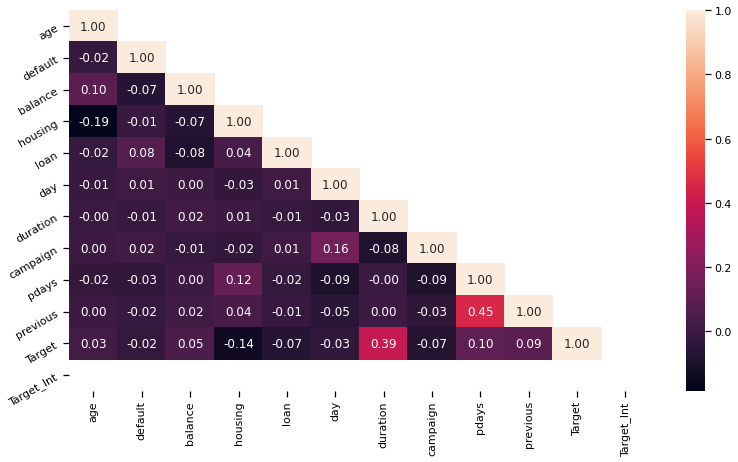

In [446]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<b>Target variable has relatively strong correlation with duration variable at 0.39 </b>

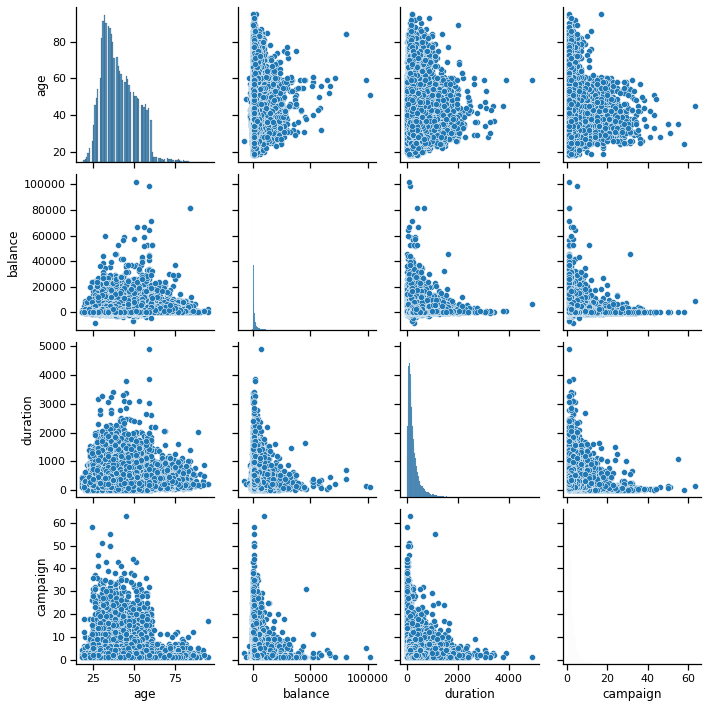

In [447]:
sns.pairplot(bd[['age','balance','duration','campaign']]);

# Deliverable – 2 (Prepare the data for analytics) – (10)

1. Ensure the attribute types are correct. If not, take appropriate actions.
* Get the data model ready.
* Transform the data i.e. scale / normalize if required
* Create the training set and test set in ratio of 70:30

In [448]:
#changing objet to categorical data type
col_obj =bd.select_dtypes(include ='object')
for nun in col_obj:
    bd[nun] = bd[nun].astype('category')

In [449]:
data = pd.get_dummies(bd, columns=['job','marital','education','default','housing','loan','contact','day','month','poutcome'])

In [450]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'Target_Int', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'month_apr', 'month_aug',
       'month

In [451]:
X = data.drop(columns=['Target'])
X.shape

(45211, 82)

In [452]:
y = data['Target']
y.shape

(45211,)

In [453]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [454]:
# checking splitting data 70:30
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100), '- total of', len(X_train))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100),'- total of', len(X_test))

70.00% data is in training set - total of 31647
30.00% data is in test set - total of 13564


In [455]:
print("Total records: ", len(data.index))
print("Training records: ", len(x_train))
print("Testing records: ",len(x_test))

Total records:  45211
Training records:  31126
Testing records:  13340


In [456]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

68.85% data is in training set
29.51% data is in test set


In [457]:
pos = y_train[y_train == 1].count()
neg = y_train[y_train == 0].count()
print("Positive = ", pos)
print("Negative = ", neg)
perc = pos/len(y_train)
print(perc)

Positive =  3694
Negative =  27953
0.1167251240243941


In [458]:
pos = y_test[y_test == 1].count()
neg = y_test[y_test == 0].count()
print("Positive = ", pos)
print("Negative = ", neg)
perc = pos/len(y_test)
print(perc)

Positive =  1595
Negative =  11969
0.11759068121498083


-----------------------------

# Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
* Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
* Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [459]:
sc_tra,sc_tes,TPf,TNf,FPf,FNf = 0,0,0,0,0,0
Rec,Spec,Pres,Accu,f1,logit_roc_auc = 0,0,0,0,0,0

def score_confmetrics(model, X_train, y_train, X_test, y_test):
    global sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc
    ml_train = model.fit(X_train, y_train)
    sc_tra = round(ml_train.score(X_train, y_train),4)
    sc_tes = round(ml_train.score(X_test, y_test),4)
    # prediction
    y_predict = model.predict(X_test)
    #score the model
    print('\n' * 1)
    print('Model score_train :',round(sc_tra,4))
    print('Model score_test :',round(sc_tes,4))
    # confusion metrics
    confusion=confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    #Metric data
    print('\n' * 1)
    TPf = confusion[1,1]
    TNf = confusion[0,0]
    FPf = confusion[1,0]
    FNf = confusion[0,1]
    # classification report
    Rec = round(TPf/float(TPf+FNf),4)
    Spec = round(TNf/float(TNf+FPf),4)
    Pres = round(TPf/float(TPf+FPf),4)
    #Accu = round((TPf+TNf)/float(TPf+TNf+FPf+FNf),4)
    f1 = round(2*Pres*Rec/(Pres+Rec),4)
    print(classification_report(y_predict, y_test))
     # ROC Curve
    logit_roc_auc = round(roc_auc_score(y_test, model.predict(X_test)),4)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    # output
    return(sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc)

-------------------

<b>Logistic Regression</b>

In [460]:
#Logistic Regression - Hyper Parameters Optimizaton

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


clas_LR = LogisticRegression()
params_LR={
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  :['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' :[100, 1000, 2000, 3000, 4000]
}
random_searchLR=RandomizedSearchCV(clas_LR,param_distributions=params_LR,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

random_searchLR.fit(X_train, y_train);

random_searchLR.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.1min finished


{'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 2000}



Model score_train : 0.9044
Model score_test : 0.9006


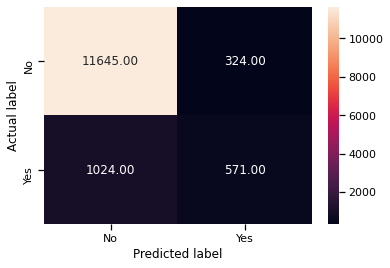



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12669
           1       0.36      0.64      0.46       895

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564



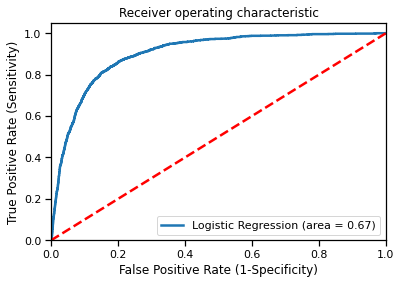

In [461]:
# Fit the model on train
model_LR = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LR
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LR, ste_LR, TP_LR, TN_LR,FP_LR, FN_LR = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LR,S_LR,P_LR,A_LR,f1_LR,l_LR = Rec,Spec,Pres,Accu,f1,logit_roc_auc

-------------

<b>Building Decision Tree Model</b>



Model score_train : 1.0
Model score_test : 0.8771


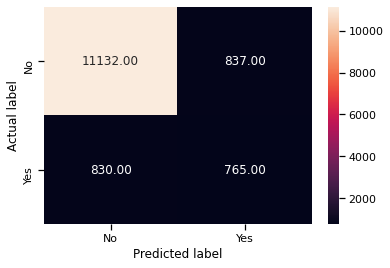



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11962
           1       0.48      0.48      0.48      1602

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



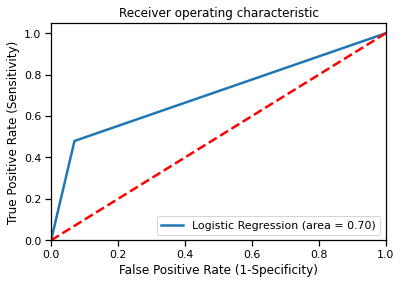

In [462]:
# decision tree number
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
# calling score_confmetrics funtion
model = dTree
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DT, ste_DT, TP_DT, TN_DT,FP_DT, FN_DT = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DT,S_DT,P_DT,A_DT,f1_DT,l_DT = Rec,Spec,Pres,Accu,f1,logit_roc_auc

---------------

<b>Decision Tree Classifier - Hyper Parameters Optimizaton</b>

In [463]:
#Reduce Overfitting by Decision Tree Classifier - Hyper Parameters Optimizaton
clas_DTr = DecisionTreeClassifier()
#
params_DTr={
    'criterion'        :['gini','entropy'],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split':[ 2, 3, 5, 7, 10],
    'min_samples_leaf' :[ 1, 2, 3, 5, 7, 10],
}
#
random_searchDT=RandomizedSearchCV(clas_DTr,param_distributions=params_DTr,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);
random_searchDT.fit(X_train, y_train);

random_searchDT.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished


{'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 13,
 'criterion': 'gini'}



Model score_train : 0.9042
Model score_test : 0.8971


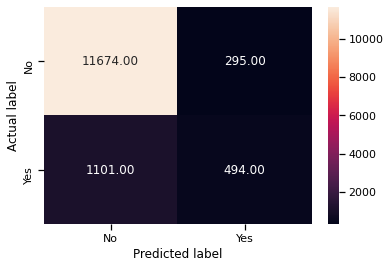



              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12775
           1       0.31      0.63      0.41       789

    accuracy                           0.90     13564
   macro avg       0.64      0.77      0.68     13564
weighted avg       0.94      0.90      0.91     13564



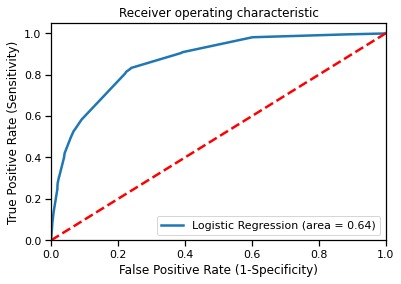

In [464]:
# decision tree number
dTree_r = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=10, random_state=1 )
# calling score_confmetrics funtion
model = dTree_r
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DTr, ste_DTr, TP_DTr, TN_DTr,FP_DTr, FN_DTr = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DTr,S_DTr,P_DTr,A_DTr,f1_DTr,l_DTr = Rec,Spec,Pres,Accu,f1,logit_roc_auc

--------------------

<b>Visualization - Reducing over fitting</b>

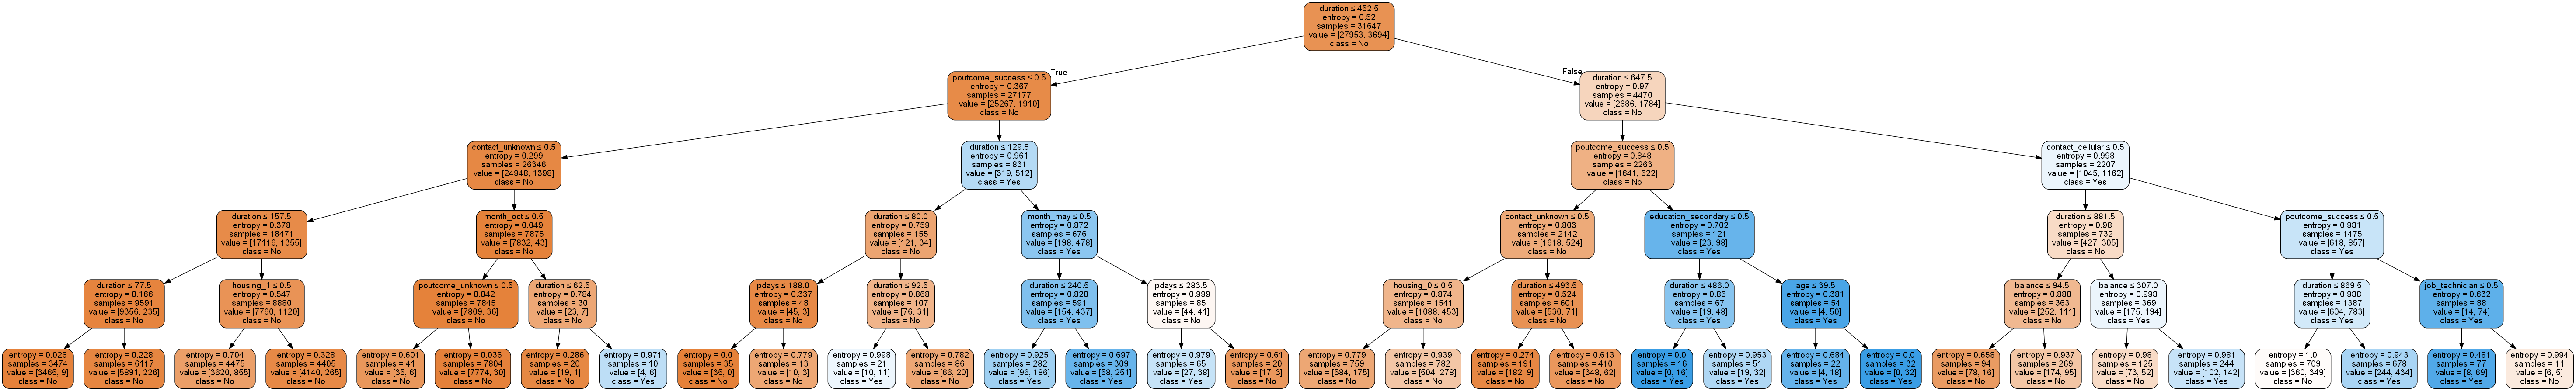

In [465]:
#Visualization - Reducing Overfitting

from sklearn.tree import export_graphviz
import io
from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz
#
xvar = data.drop(columns=['Target'])
feature_cols = xvar.columns
train_char_label = ['No', 'Yes']

bank_tar = StringIO()
export_graphviz(dTree_r, out_file=bank_tar,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=train_char_label)
graph_bt = pydotplus.graph_from_dot_data(bank_tar.getvalue())  
graph_bt.write_png('bank_target.png')
Image(graph_bt.create_png())

---------------------------------------

<b>Ensemble learning - Bagging</b>

In [466]:
#Bagging Classifier - Hyper Parameters Optimizaton

from sklearn.ensemble import BaggingClassifier

clas_B = BaggingClassifier()
#
params_B={
    'n_estimators' :[10, 25, 50, 75, 100],
    'max_samples'  :[0.01, 0.1, 0.5, 0.75, 1.0],
    'max_features'  :[0.01, 0.1, 0.5, 0.75, 1.0]
}
#
random_searchB=RandomizedSearchCV(clas_B,param_distributions=params_B,
                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

random_searchB.fit(X_train, y_train);

random_searchB.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   54.4s finished


{'n_estimators': 75, 'max_samples': 0.5, 'max_features': 1.0}



Model score_train : 0.8992
Model score_test : 0.8946


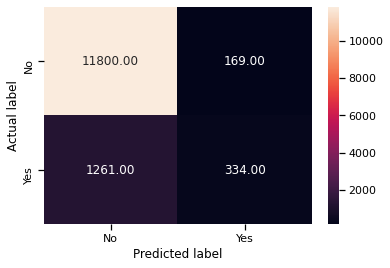



              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13061
           1       0.21      0.66      0.32       503

    accuracy                           0.89     13564
   macro avg       0.60      0.78      0.63     13564
weighted avg       0.96      0.89      0.92     13564



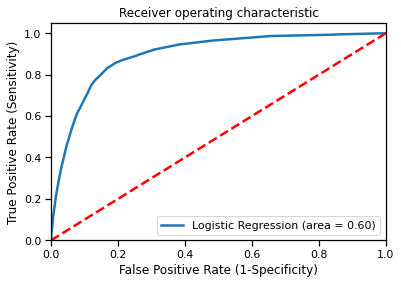

In [467]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= 0.01,max_features= 0.75, random_state=1)
# calling score_confmetrics funtion
model = bgcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_bg, ste_bg, TP_bg, TN_bg,FP_bg, FN_bg = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_bg,S_bg,P_bg,A_bg,f1_bg,l_bg = Rec,Spec,Pres,Accu,f1,logit_roc_auc

-----------------------------------------

<b>Random Forest Classifier</b>

In [468]:
#Random Forest Classifier - Hyper Parameters Optimizaton

from sklearn.ensemble import RandomForestClassifier

clas_RF = RandomForestClassifier()
#
params_RF={
    'criterion'        :['gini','entropy'],
    'n_estimators' :[100, 250, 500, 750, 1000],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split' :[2, 3, 5, 7, 10, 15],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10, 15]
}
#
random_searchRF=RandomizedSearchCV(clas_RF,param_distributions=params_RF,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);


random_searchRF.fit(X_train, y_train);



random_searchRF.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


{'n_estimators': 750,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 13,
 'criterion': 'gini'}



Model score_train : 0.9171
Model score_test : 0.8983


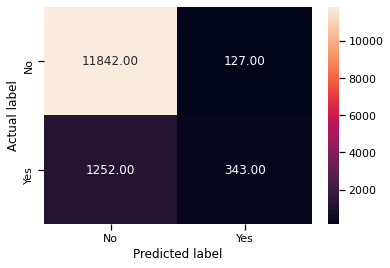



              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13094
           1       0.22      0.73      0.33       470

    accuracy                           0.90     13564
   macro avg       0.60      0.82      0.64     13564
weighted avg       0.96      0.90      0.92     13564



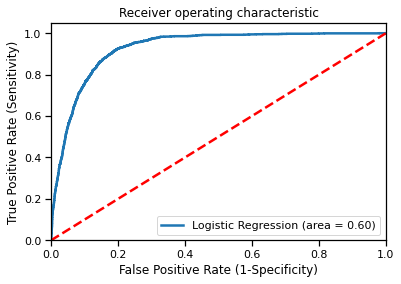

In [469]:
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, max_depth=15, 
                              min_samples_split=15, min_samples_leaf=2,random_state=1)
# calling score_confmetrics funtion
model = rfcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_rf, ste_rf, TP_rf, TN_rf,FP_rf, FN_rf = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_rf,S_rf,P_rf,A_rf,f1_rf,l_rf = Rec,Spec,Pres,Accu,f1,logit_roc_auc

-------------------------------

<b>AdaBossting</b>

In [470]:
#AdaBoosting Classifier - Hyper Parameters Optimizaton

from sklearn.ensemble import AdaBoostClassifier

clas_AB = AdaBoostClassifier()
#
params_AB={
    'n_estimators' :[50, 100, 150, 200, 250],
    'learning_rate'  :[0.1, 0.3, 0.5, 0.75, 1.0],
}
#
random_searchAB=RandomizedSearchCV(clas_AB,param_distributions=params_AB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);


random_searchAB.fit(X_train, y_train);


random_searchAB.best_params_



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


{'n_estimators': 250, 'learning_rate': 0.5}



Model score_train : 0.9037
Model score_test : 0.898


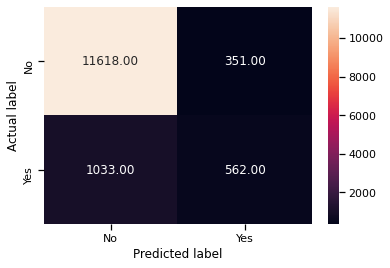



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12651
           1       0.35      0.62      0.45       913

    accuracy                           0.90     13564
   macro avg       0.66      0.77      0.70     13564
weighted avg       0.93      0.90      0.91     13564



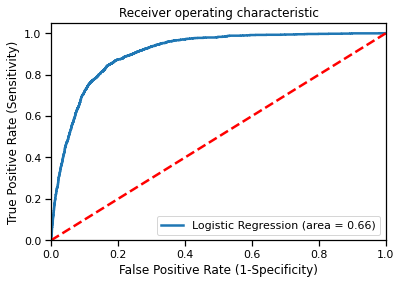

In [471]:
abcl = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=1)
# calling score_confmetrics funtion
model = abcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_ab, ste_ab, TP_ab, TN_ab,FP_ab, FN_ab = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_ab,S_ab,P_ab,A_ab,f1_ab,l_ab = Rec,Spec,Pres,Accu,f1,logit_roc_auc

--------------------------

<b>GradientBoost</b>

In [472]:
#GradientBoost Classifier - Hyper Parameters Optimizaton

from sklearn.ensemble import GradientBoostingClassifier

clas_GB = GradientBoostingClassifier()
#
params_GB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.01, 0.05, 0.075, 0.1],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[2, 3, 5, 7, 10],
}
#
random_searchGB=RandomizedSearchCV(clas_GB,param_distributions=params_GB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

random_searchGB.fit(X_train, y_train);

random_searchGB.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'learning_rate': 0.1}



Model score_train : 0.9043
Model score_test : 0.8972


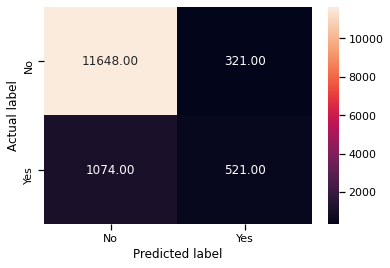



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12722
           1       0.33      0.62      0.43       842

    accuracy                           0.90     13564
   macro avg       0.65      0.77      0.69     13564
weighted avg       0.93      0.90      0.91     13564



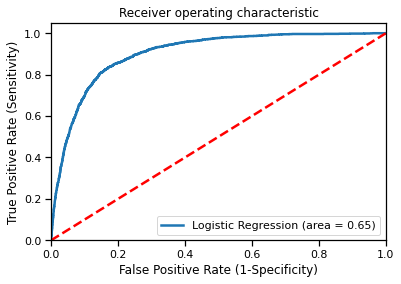

In [473]:
gbcl = GradientBoostingClassifier(n_estimators = 200, max_depth=1, 
                                  learning_rate=0.1, min_samples_leaf=2,
                                  min_samples_split=2, random_state=1)
# calling score_confmetrics funtion
model = gbcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_gb, ste_gb, TP_gb, TN_gb,FP_gb, FN_gb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_gb,S_gb,P_gb,A_gb,f1_gb,l_gb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

---------------------

<b>XGBoost Classifier</b>

In [474]:
#XGBoost Classifier - Hyper Parameters Optimizaton

import xgboost as xgb

classifier = xgb.XGBClassifier()
#
params={
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train, y_train);

random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.8s finished


{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.75,
 'gamma': 0.3,
 'colsample_bytree': 0.3}



Model score_train : 0.916
Model score_test : 0.901


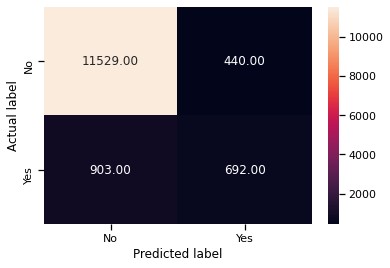



              precision    recall  f1-score   support

           0       0.96      0.93      0.94     12432
           1       0.43      0.61      0.51      1132

    accuracy                           0.90     13564
   macro avg       0.70      0.77      0.73     13564
weighted avg       0.92      0.90      0.91     13564



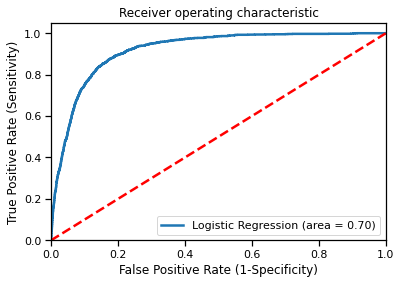

In [475]:
xgb_m = xgb.XGBClassifier(min_child_weight= 5,
                          max_depth= 2,
                          learning_rate= 0.75,
                          gamma= 0.1,
                          colsample_bytree= 0.4, random_state=1)
#
# calling score_confmetrics funtion
model = xgb_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_xgb, ste_xgb, TP_xgb, TN_xgb,FP_xgb, FN_xgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_xgb,S_xgb,P_xgb,A_xgb,f1_xgb,l_xgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

----------------------

<b>LightGBM</b>

In [479]:
#XLightGBM Classifier - Hyper Parameters Optimizaton

import lightgbm as lgbm

clas_LGB = lgbm.LGBMClassifier()
#
params_LGB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.02, 0.04, 0.06, 0.08, 0.1]
}
#
random_searchLGB=RandomizedSearchCV(clas_LGB,param_distributions=params_LGB,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

random_searchLGB.fit(X_train, y_train);

random_searchLGB.best_params_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.2s finished


{'n_estimators': 200, 'learning_rate': 0.04}



Model score_train : 0.9239
Model score_test : 0.9034


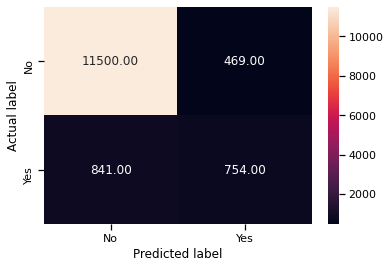



              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12341
           1       0.47      0.62      0.54      1223

    accuracy                           0.90     13564
   macro avg       0.72      0.77      0.74     13564
weighted avg       0.92      0.90      0.91     13564



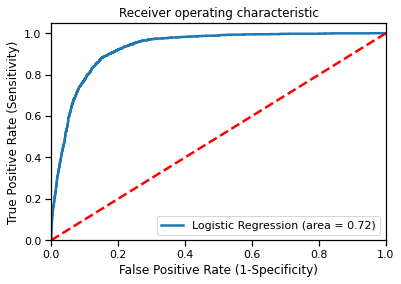

In [480]:
lgbm_m = lgbm.LGBMClassifier(n_estimators = 150, learning_rate=0.04, random_state=1)
# calling score_confmetrics funtion
model = lgbm_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_lgb, ste_lgb, TP_lgb, TN_lgb,FP_lgb, FN_lgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_lgb,S_lgb,P_lgb,A_lgb,f1_lgb,l_lgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

<b>Summary of the Algoritms</b>

In [481]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression','Decision Tree- Reduce Overfit',
                                    'Bagging','RandomForest - Reduce Overfit',
                                    'AdaBoosting','GradientBoost','XGBoost','LightGBM'], 
                         'Score_Train':   [str_LR,str_DTr,str_bg,str_rf,str_ab,str_gb,str_xgb,str_lgb],
                         'Score_Test':    [ste_LR,ste_DTr,ste_bg,ste_rf,ste_ab,ste_gb,ste_xgb,ste_lgb],
                         'True Positive': [ TP_LR, TP_DTr, TP_bg, TP_rf, TP_ab, TP_gb, TP_xgb, TP_lgb],
                         'True Negative': [ TN_LR, TN_DTr, TN_bg, TN_rf, TN_ab, TN_gb, TN_xgb, TN_lgb],
                         'False Positive':[ FP_LR, FP_DTr, FP_bg, FP_rf, FP_ab, FP_gb, FP_xgb, FP_lgb],
                         'False Negative':[ FN_LR, FN_DTr, FN_bg, FN_rf, FN_ab, FN_gb, FN_xgb, FN_lgb],
                         'Recall':        [  R_LR,  R_DTr,  R_bg,  R_rf,  R_ab,  R_gb,  R_xgb,  R_lgb],
                         'Specifity':     [  S_LR,  S_DTr,  S_bg,  S_rf,  S_ab,  S_gb,  S_xgb,  S_lgb],
                         'Precision':     [  P_LR,  P_DTr,  P_bg,  P_rf,  P_ab,  P_gb,  P_xgb,  P_lgb],
                         'F1':            [ f1_LR, f1_DTr, f1_bg, f1_rf, f1_ab, f1_gb, f1_xgb, f1_lgb],
                         'Area U_Curve':  [  l_LR,  l_DTr,  l_bg,  l_rf,  l_ab,  l_gb,  l_xgb,  l_lgb] })

resultsDf = resultsDf[['Method', 'Score_Train','Score_Test','True Positive','True Negative','False Positive',
                       'False Negative','Recall','Specifity','Precision','F1','Area U_Curve']]

resultsDf=resultsDf.sort_values(by=['Area U_Curve']).set_index('Method')


resultsDf

Score_Train  Score_Test  True Positive  \
Method                                                                  
Bagging                             0.8992      0.8946            334   
RandomForest - Reduce Overfit       0.9171      0.8983            343   
Decision Tree- Reduce Overfit       0.9042      0.8971            494   
GradientBoost                       0.9043      0.8972            521   
AdaBoosting                         0.9037      0.8980            562   
Logistic Regression                 0.9044      0.9006            571   
XGBoost                             0.9160      0.9010            692   
LightGBM                            0.9239      0.9034            754   

                               True Negative  False Positive  False Negative  \
Method                                                                         
Bagging                                11800            1261             169   
RandomForest - Reduce Overfit          11842            1252             127   
Decision Tree- Reduce Overfit          11674            1101             295   
GradientBoost                          11648            1074             321   
AdaBoosting                            11618            1033             351   
Logistic Regression                    11645            1024             324   
XGBoost                                11529             903             440   
LightGBM                               11500             841             469   

                               Recall  Specifity  Precision      F1  \
Method                                                                
Bagging                        0.6640     0.9035     0.2094  0.3184   
RandomForest - Reduce Overfit  0.7298     0.9044     0.2150  0.3321   
Decision Tree- Reduce Overfit  0.6261     0.9138     0.3097  0.4144   
GradientBoost                  0.6188     0.9156     0.3266  0.4275   
AdaBoosting                    0.6156     0.9183     0.3524  0.4482   
Logistic Regression            0.6380     0.9192     0.3580  0.4586   
XGBoost                        0.6113     0.9274     0.4339  0.5075   
LightGBM                       0.6165     0.9319     0.4727  0.5351   

                               Area U_Curve  
Method                                       
Bagging                              0.5976  
RandomForest - Reduce Overfit        0.6022  
Decision Tree- Reduce Overfit        0.6425  
GradientBoost                        0.6499  
AdaBoosting                          0.6615  
Logistic Regression                  0.6655  
XGBoost                              0.6985  
LightGBM                             0.7168

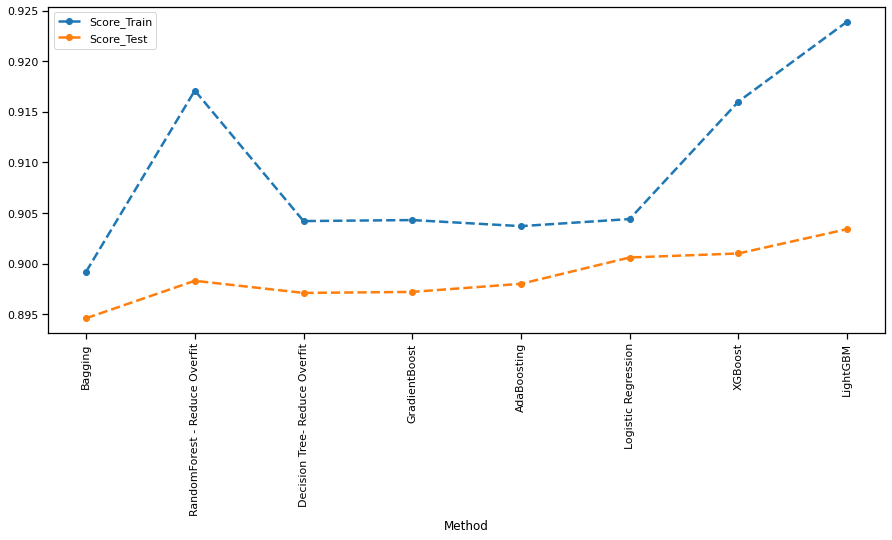

In [482]:
ax=resultsDf[['Score_Train','Score_Test']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

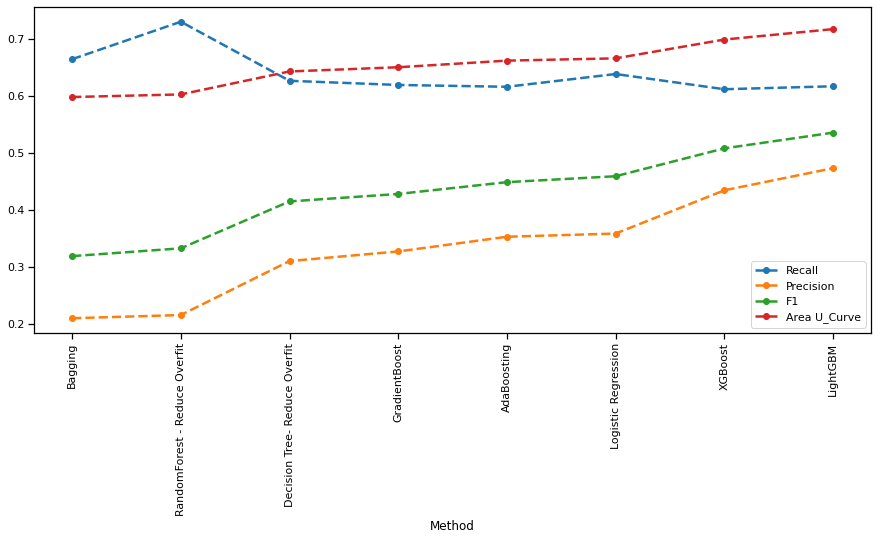

In [483]:
ax =resultsDf[['Recall','Precision','F1', 'Area U_Curve']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

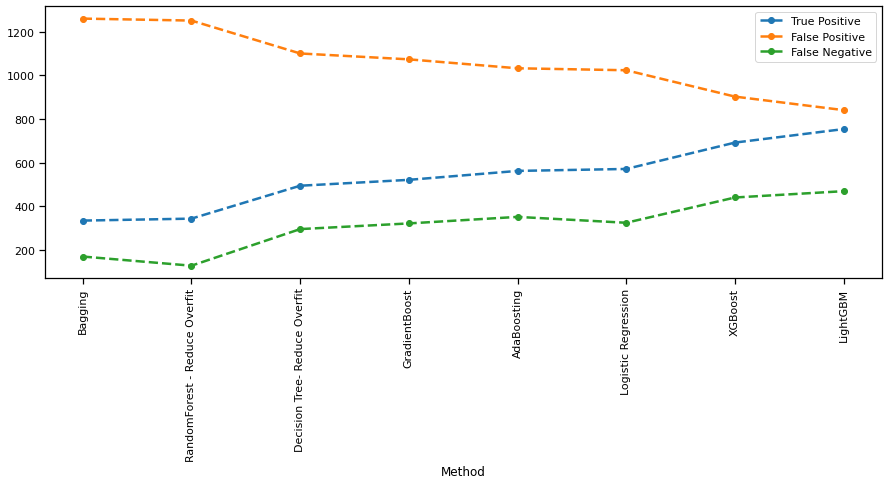

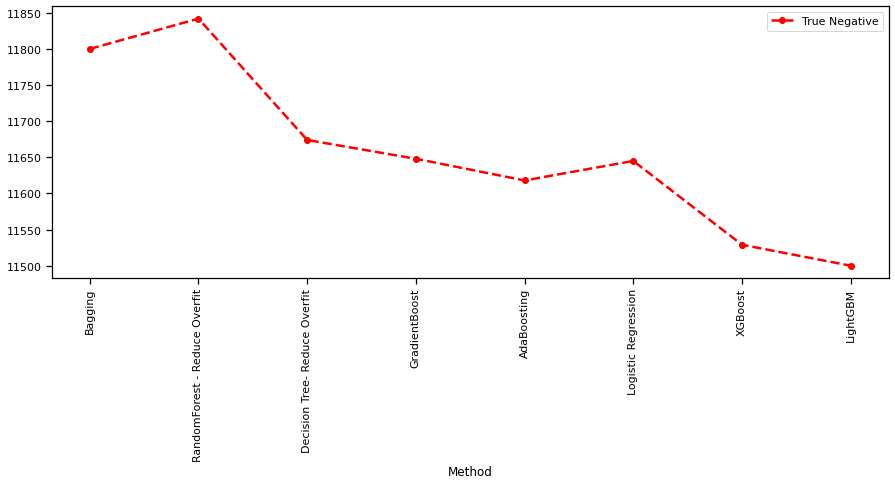

In [484]:
ax = resultsDf[['True Positive','False Positive','False Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o');

ax = resultsDf[['True Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o', color='r');

In [485]:
resultsDf.describe()

Score_Train  Score_Test  True Positive  True Negative  False Positive  \
count     8.000000    8.000000       8.000000       8.000000        8.000000   
mean      0.909100    0.898775     533.875000   11657.000000     1061.125000   
std       0.008676    0.002757     148.211661     118.165743      148.211661   
min       0.899200    0.894600     334.000000   11500.000000      841.000000   
25%       0.904075    0.897175     456.250000   11595.750000      993.750000   
50%       0.904350    0.898150     541.500000   11646.500000     1053.500000   
75%       0.916275    0.900700     601.250000   11705.500000     1138.750000   
max       0.923900    0.903400     754.000000   11842.000000     1261.000000   

       False Negative    Recall  Specifity  Precision        F1  Area U_Curve  
count        8.000000  8.000000   8.000000   8.000000  8.000000      8.000000  
mean       312.000000  0.640013   0.916763   0.334713  0.430225      0.654312  
std        118.165743  0.040103   0.009924   0.092936  0.076054      0.041619  
min        127.000000  0.611300   0.903500   0.209400  0.318400      0.597600  
25%        263.500000  0.616275   0.911450   0.286025  0.393825      0.632425  
50%        322.500000  0.622450   0.916950   0.339500  0.437850      0.655700  
75%        373.250000  0.644500   0.921250   0.376975  0.470825      0.673750  
max        469.000000  0.729800   0.931900   0.472700  0.535100      0.716800

<b>Final Observations:

1.- The lowest two performace models: Bagging and RandomForest.

2.- the best two performance models: XGBoost and LightGBM (Best Algoritm).

3.- Algorit shows a better performance in this order:

- (1-lowest performance) Bagging, (2) RandomForest-Red. Overfit, (3) Decision Tree-Red. Overfit, (4) GradientBoost
(5) AdaBoosting, (6) Logistic Regression, (7) XGBoost, (8-best performance) LightGBM </b>